In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv("House_train.csv")

In [203]:
fl =[]
for i in train.columns:
    if train[i].dtypes == 'float':
        fl.append(i)
fl

['BsmtUnfSF',
 'GarageArea',
 'GrLivArea',
 'LotFrontage',
 'SalePrice',
 'TotalBsmtSF',
 'FlrsSF']

In [ ]:
train = train[(train.GrLivArea < 4600)]

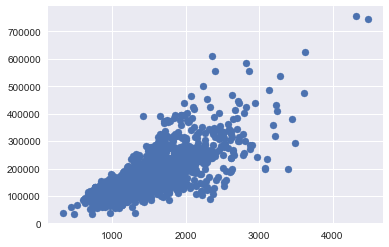

In [4]:
plt.scatter(y = train.SalePrice, x= train.GrLivArea)

In [155]:
#names= train.drop(features_todrop, axis = 1).drop(["SalePrice", "Id"], axis = 1).columns   ##'BsmtFinSFtot', 'BsmtUnfSF', 'TotalBsmtSF'
names = train.drop(["SalePrice", "Id", 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'ExterCond', 'Fireplaces', 'Functional', 
                'GarageCond', 'HalfBath', 'KitchenAbvGr', 'LandSlope', 'MiscVal'], axis = 1).columns

In [ ]:
from math import log10
train.SalePrice = train.SalePrice.apply(lambda x: log10(x))

In [ ]:
#'LotArea', 'BsmtFinSFtot', - to categories!!!
plt.hist(train.FlrsSF, bins=10)

In [ ]:
#excludes the insignificant categorials
y = train.SalePrice.values
X = train.drop(["SalePrice", "Id", 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'ExterCond', 'Fireplaces', 'Functional', 
                'GarageCond', 'HalfBath', 'KitchenAbvGr', 'LandSlope', 'MiscVal', 'BsmtUnfSF',  'GarageArea'], axis = 1).values
#X = train.drop(["SalePrice", "Id", 'GrLivArea', 'BsmtFinSFtot', 'BsmtUnfSF', 'TotalBsmtSF'], axis = 1).drop(features_todrop, axis = 1).values
#X = train[['GrLivArea', 'OverallQual']].values

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Linear regression

In [209]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [210]:
y_pred = regressor.predict(X_test)

In [211]:
y_pred1 = []
for i in y_pred:
    y_pred1.append(round(float(i),0))

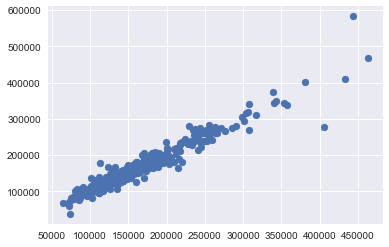

In [212]:
from math import pow
y_pr = [ pow(10, x) for x in y_pred ]
y_te =  [ pow(10, x) for x in y_test ]
plt.scatter(y_pr, y_te)

In [182]:
residuals = np.array(y_pred1) - y_test

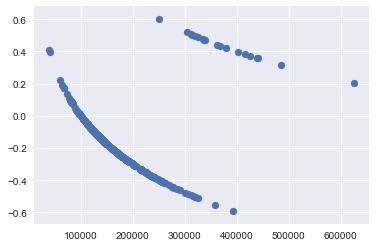

In [183]:
plt.scatter(y_te, residuals)

In [184]:
from sklearn.metrics import r2_score

In [213]:
r2_score(y_te, y_pr) 

0.92484108950454691

In [214]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_te, y_pr))
rms

19322.847896927615

# Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 15, random_state = 0)
regressor.fit(X, y)
# Predicting a new result
y_pred = regressor.predict(X_test)

In [130]:
residuals = (np.array(y_pred) - y_test)

In [131]:
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

0.031102275041595007

In [132]:
r2_score(y_test, y_pred) 

0.96808966737996704

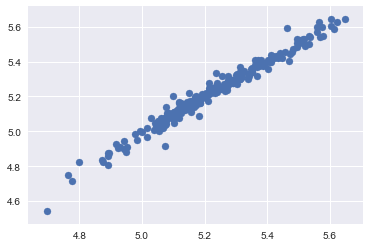

In [97]:
plt.scatter(y_pred, y_test)

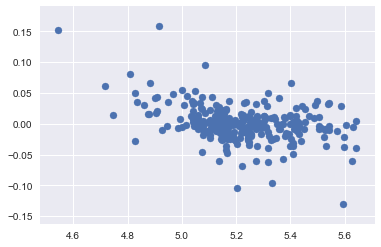

In [98]:
plt.scatter(y_test, residuals)

In [30]:
marks = train.drop(['SalePrice', "Id"], axis = 1).columns.tolist()

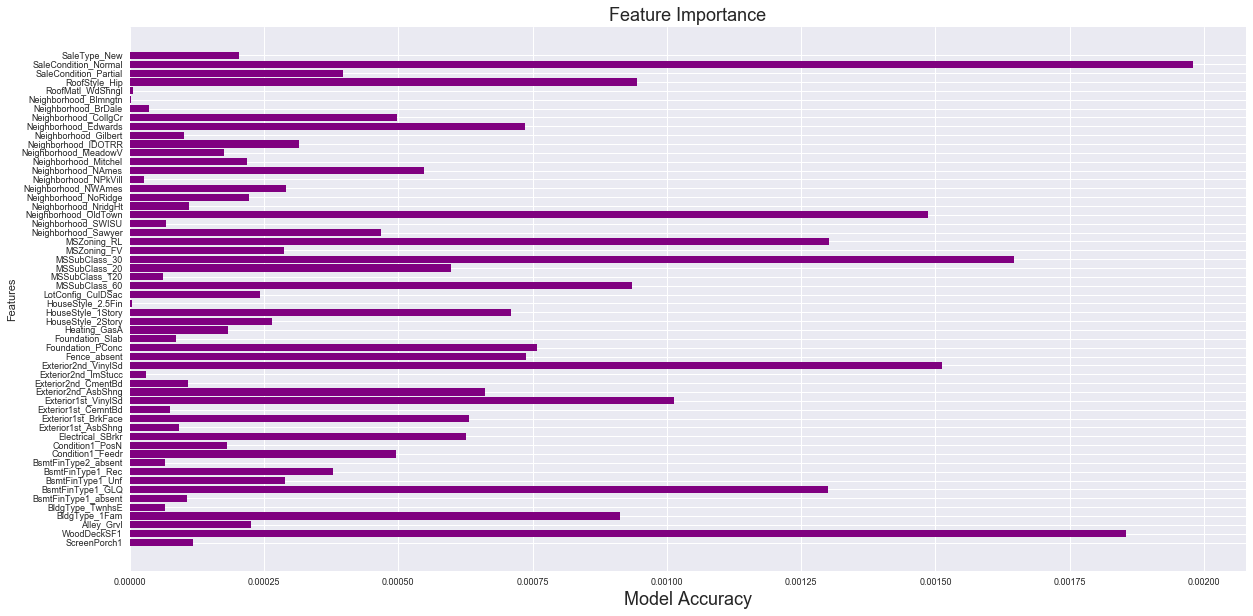

In [105]:
importance = regressor.feature_importances_
imp = importance[40:]
pos = np.arange(len(imp))
plt.figure(figsize=(20,10))
plt.barh(pos, imp, align='center', color = 'purple')
plt.title("Feature Importance", fontsize = 18)
plt.xlabel("Model Accuracy", fontsize = 18)
plt.ylabel("Features")
plt.yticks(pos, names[40:])
plt.tick_params(axis='both', which='major', labelsize=9)
plt.grid(True)

In [106]:
features_f = pd.DataFrame(importance, names).reset_index()
features_f.columns = ['Features', 'Score']
features_todrop = features_f[features_f['Score'] < 0.0005]['Features'].tolist()
features_f.sort_values(by='Score', ascending=False)
#len(features_todrop)
#features_f

,Features,Score
22,OverallQual,5.515729e-01
33,FlrsSF,1.303716e-01
27,TotalBsmtSF,5.444816e-02
9,GarageArea,4.085076e-02
32,BsmtFinSFtot,3.435205e-02
5,CentralAir,2.550820e-02
10,GarageCars,2.325373e-02
17,LotArea,1.491566e-02
21,OverallCond,1.350767e-02
11,GarageFinish,7.686700e-03


In [146]:
features_todrop

['BedroomAbvGr',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'CentralAir',
 'ExterCond',
 'ExterQual',
 'FireplaceQu',
 'Fireplaces',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'HalfBath',
 'HeatingQC',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotFrontage',
 'LotShape',
 'MasVnrType',
 'MiscVal',
 'OverallCond',
 'PavedDrive',
 'PoolQC',
 'Street',
 'TotRmsAbvGrd',
 'Utilities',
 'Remodelled_ago',
 'Sold_ago',
 'Garage_ago',
 '3SsnPorch1',
 'EnclosedPorch1',
 'MasVnrArea1',
 'OpenPorchSF1',
 'LowQualFinSF1',
 'PoolArea1',
 'ScreenPorch1',
 'WoodDeckSF1',
 'Alley_Pave',
 'Alley_absent',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType1_absent',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFin

# SVR

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')

In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
r2_score(y_test, y_pred) 

In [ ]:
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

# prediction of test set

In [215]:
test = pd.read_csv("House_test.csv")
#X_predict = test.drop(["SalePrice", "Id", 'GrLivArea', 'BsmtFinSFtot', 'BsmtUnfSF', 'TotalBsmtSF'], axis = 1).values
#X_predict = test[['GrLivArea', 'OverallQual']]
X_predict = test.drop(["SalePrice", "Id", 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'ExterCond', 'Fireplaces', 'Functional', 
                'GarageCond', 'HalfBath', 'KitchenAbvGr', 'LandSlope', 'MiscVal', 'BsmtUnfSF',  'GarageArea'], axis = 1).values


In [216]:
y_pred = regressor.predict(X_predict)
y_pred1 = [pow(10,x) for x in y_pred]

In [217]:
len(y_pred)

1459

In [218]:
pred = pd.DataFrame(test.Id, columns=['Id', 'SalePrice'])
pred.SalePrice = y_pred1
pred.SalePrice = pred.SalePrice.apply(lambda x: round(x,1))

In [219]:
pred.SalePrice = y_pred1
pred.SalePrice = pred.SalePrice.apply(lambda x: round(x,1))

In [220]:
pred.to_csv("Houses_prediction.csv", index = False)

In [221]:
pred

,Id,SalePrice
0,1461,110116.2
1,1462,162270.7
2,1463,177550.8
3,1464,203679.1
4,1465,198094.6
5,1466,166308.1
6,1467,178486.4
7,1468,162165.5
8,1469,186871.7
9,1470,113463.3
